In [11]:
from IPython.display import Image,SVG
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from keras.layers import Input,Dense,Conv2D,MaxPool2D,UpSampling2D,Flatten,Reshape,GaussianNoise
from keras.models import Model,Sequential
from keras import regularizers

In [12]:
(X_train,_),(X_test,_) = mnist.load_data()

max_value = float(X_train.max())
x_train = X_train.astype('float32')/max_value
x_test = X_test.astype('float32')/max_value

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
x_train  = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [15]:
#Auto Encoder Model


autoEncoder = Sequential()


In [16]:
#Encoder

autoEncoder.add(Conv2D(16,(3,3),padding='same',activation='relu',input_shape=x_train.shape[1:]))
autoEncoder.add(GaussianNoise(0.1))
autoEncoder.add(MaxPool2D((2,2),padding='same'))
autoEncoder.add(Conv2D(8,(3,3),padding='same',activation='relu'))
autoEncoder.add(MaxPool2D((2,2),padding='same'))
autoEncoder.add(Conv2D(8,(3,3),strides=(2,2),activation='relu',padding='same'))

In [17]:
autoEncoder.add(Flatten())
autoEncoder.add(Reshape((4,4,8)))

In [18]:
#Decoder
autoEncoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoEncoder.add(UpSampling2D((2,2)))

autoEncoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoEncoder.add(UpSampling2D((2,2)))

autoEncoder.add(Conv2D(16,(3,3),activation='relu'))
autoEncoder.add(UpSampling2D((2,2)))

autoEncoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

In [20]:
autoEncoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [21]:
encoder = Model(inputs=autoEncoder.input,outputs=autoEncoder.get_layer('flatten_2').output)

In [22]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           584 

In [23]:
autoEncoder.compile(optimizer='adam',loss='binary_crossentropy')
autoEncoder.fit(x_train,x_train,epochs=100,batch_size=128,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 60s 999us/step - loss: 0.2250 - val_loss: 0.1750
Epoch 2/100
60000/60000 [==============================] - 59s 986us/step - loss: 0.1391 - val_loss: 0.1485
Epoch 3/100
60000/60000 [==============================] - 59s 989us/step - loss: 0.1201 - val_loss: 0.1372
Epoch 4/100
60000/60000 [==============================] - 59s 988us/step - loss: 0.1116 - val_loss: 0.1290
Epoch 5/100
60000/60000 [==============================] - 59s 987us/step - loss: 0.1071 - val_loss: 0.1231
Epoch 6/100
60000/60000 [==============================] - 60s 993us/step - loss: 0.1039 - val_loss: 0.1185
Epoch 7/100
60000/60000 [==============================] - 59s 987us/step - loss: 0.1015 - val_loss: 0.1169
Epoch 8/100
60000/60000 [==============================] - 60s 993us/step - loss: 0.0996 - val_loss: 0.1109
Epoch 9/100
60000/60000 [==============================] - 60s 992us/step - loss: 0.09

KeyboardInterrupt: 

In [ ]:
autoEncoder.save('./models/CnnAutoEncoder.')

In [ ]:
import keras
newModel = keras.models.load_model('./models/CnnAutoEncoder.')

In [ ]:
newModel.summary()

In [142]:
result = newModel.predict(x_test)

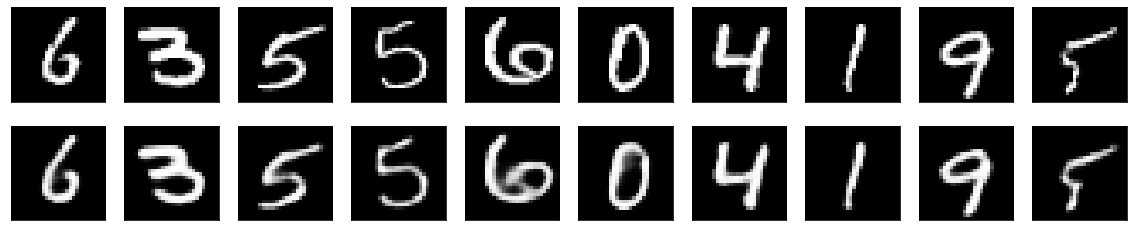

In [143]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display real
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i+50].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruct
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(result[i+50].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()